<h1> WIMP differential energy spectrum </h1>

In [1]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import') 
from pyNEST import *
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
E_vect=np.linspace(0,100*1.01,100)
rate= rates.WIMP.WIMPdiffRate(E_vect, mW=50, sig=1e-36)

In [8]:
rate

array([  9.67012770e+04,   8.85511992e+04,   8.10043009e+04,
         7.40246354e+04,   6.75784032e+04,   6.16328809e+04,
         5.61563870e+04,   5.11183513e+04,   4.64893944e+04,
         4.22413921e+04,   3.83475222e+04,   3.47822926e+04,
         3.15215527e+04,   2.85424904e+04,   2.58236163e+04,
         2.33447392e+04,   2.10869316e+04,   1.90324905e+04,
         1.71648921e+04,   1.54687436e+04,   1.39297321e+04,
         1.24567072e+04,   1.11873494e+04,   1.00385753e+04,
         8.99985954e+03,   8.06149527e+03,   7.21454186e+03,
         6.45077415e+03,   5.76263416e+03,   5.14318506e+03,
         4.58606734e+03,   4.08545727e+03,   3.63602758e+03,
         3.23291040e+03,   2.87166227e+03,   2.54823138e+03,
         2.25892680e+03,   2.00038971e+03,   1.76956652e+03,
         1.56368390e+03,   1.38022543e+03,   1.21691002e+03,
         1.07167188e+03,   9.42641921e+02,   8.28130659e+02,
         7.26612359e+02,   6.36710458e+02,   5.57184140e+02,
         4.86915992e+02,

In [9]:
# 50 GeV 1pb Data from http://pisrv0.pit.physik.uni-tuebingen.de/darkmatter/spectra/index.php 
enr,enr_rate= loadtxt('data/WIMP_m50.txt',unpack=True)

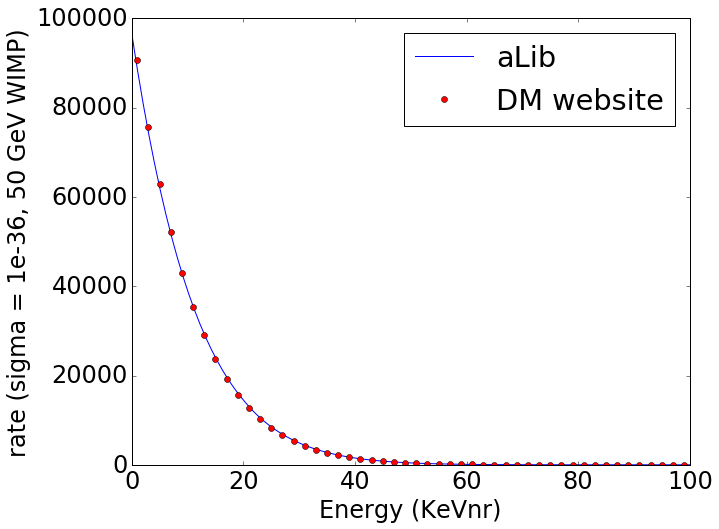

In [10]:
plt.plot(E_vect,rate)
plt.plot(enr,enr_rate,'or')
xlabel('Energy (KeVnr)')
ylabel('rate (sigma = 1e-36, 50 GeV WIMP)')
legend(('aLib','DM website'),numpoints=1)
xlim([0,100])
plt.savefig('figs/WIMP_m50_rate.png')

(0, 100)

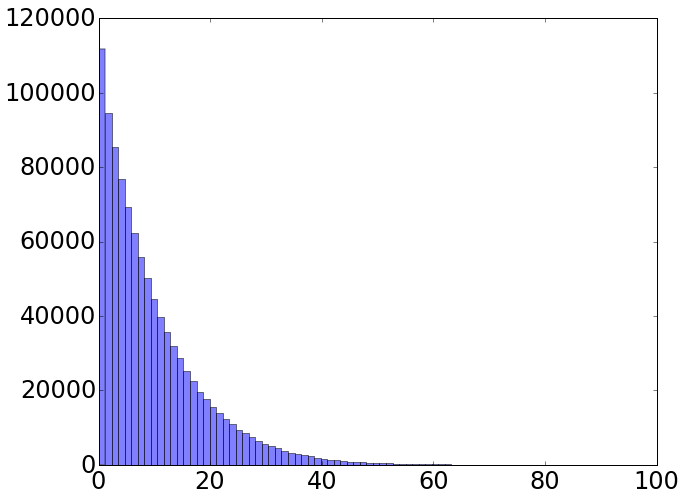

In [17]:
nSim=1e6
Er = rates.WIMP.genRandEnergies(nSim, mW=50)
plt.hist(Er,100,alpha=0.5)
xlim([0,100])

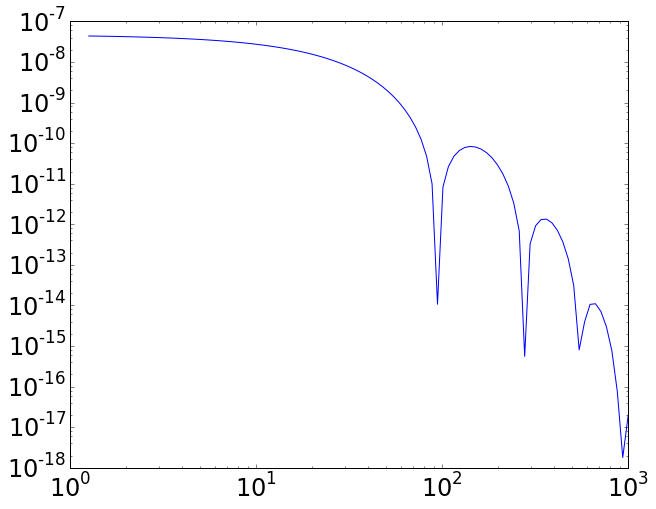

In [12]:
Er_vect=np.logspace(0.1,3,100)
drate=rates.WIMP.WIMPdiffRate(Er_vect, mW=1000, sig=1e-47)
plt.plot(Er_vect,drate)
yscale('log')
xscale('log')
savetxt('data/1000GeV_WIMP_sig47.txt',np.vstack((Er_vect,drate)).T)

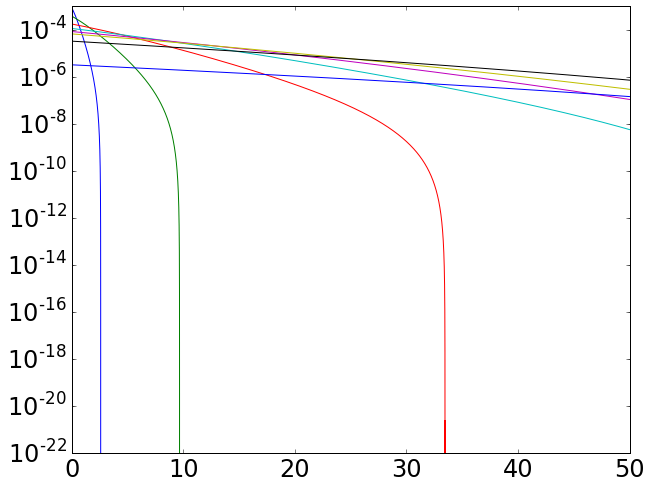

In [58]:
res=[]
masses=[5, 10,20,30,40,50,100,1000]
for mW in masses:
    Er_vect=np.linspace(0.0001,50,1000000)
    #events per kg day
    drate=rates.WIMP.WIMPdiffRate(Er_vect, mW=mW, sig=7e-46)
    plt.plot(Er_vect,drate)
    yscale('log')
    #xscale('log')
    res.append(sum(drate)*118*85*mean(diff(Er_vect)))
    #savetxt('data/1000GeV_WIMP_sig47.txt',np.vstack((Er_vect,drate)).T)

In [59]:
np.array(res)*np.array(masses)

array([  17.49287917,   52.64454059,  145.51477426,  234.80838522,
        305.41266714,  357.20581601,  469.80777167,  548.3999603 ])

In [60]:
masses

[5, 10, 20, 30, 40, 50, 100, 1000]

In [61]:
res

[3.4985758336528261,
 5.2644540593197053,
 7.2757387127596314,
 7.8269461740227388,
 7.6353166784789765,
 7.1441163201574733,
 4.698077716665809,
 0.54839996030051075]